# Задача третьей недели

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import json
from sklearn.model_selection  import KFold
from copy import deepcopy
from imblearn.over_sampling import SMOTE
from collections import Counter

# Предисловие: 
Надо удалить все пустые столбцы (209, 230)- сделано на первой неделе, столбцы с 1 уникальным значением (191,213,224,215) и с очень большим количеством неравномерных уникальных значений (например, 200,214,217,202, 199).   
Также предлагаю удалить все столбцы, где больше четверти значений пропущено

In [2]:
df = pd.read_csv('train_part.csv', sep =';', index_col=0)
df = df.drop(['Var191','Var213','Var224','Var215', 'Var200','Var214','Var217','Var202', 'Var199'], axis = 1)

В ходе выполнения задания предыдущей недели, я заметиила, что переменные 'Var222', 'Var198','Var220' обозначают одинаковые вещи (просто замена обозначенй)!   
Чтобы это было наглядно, я решла составть pivot table и убедиться, для этого создала вспомогательную едничную колонку "nu". 

In [3]:
df['nu'] = 1
piv = pd.pivot_table(df, values='nu', index=['Var222', 'Var198'], columns=['Var220'], aggfunc=np.sum)
piv

,Var220,07m8iqZ,07mQFkJ,07mRngW,07mVy8V,07mmFX7,07mmflk,07msbNi,0AJ_H4Q,0AJf6lc,0AJo2f2,...,zWAtq4h,zqsbQ71,zqsoLzk,zqssxWf,zqstvnz,zqsvdH_,zxm38SL,zxm6hzI,zxmVxx9,zxmyH3X
Var222,Var198,,,,,,,,,,,,,,,,,,,,,
00ARusu,nLJsz2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AYONy,F_e8Gsq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AhP4J,To8sKl9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
017QQMs,w9kwuGt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
017mPWC,OKQDgYr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
017qMJU,gawP82A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01f7qqc,LruNGWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
057UsvC,3PBlmZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05j67Xw,RPKu5tB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видим, колонки Var222 и Var198 полностью иденчичны, а от Var220 мы видм только пропущенные значения.  
Убедмся, что в каждой колонке сумма будет 1, то есть одно значене из Var220 соответсвует одному значению из Var222 и Var198 

In [4]:
for col in piv.columns:
    if piv[col].notna().sum().sum()!=1:
        print('Mistake! ', col)
print(piv.notna().sum())

Var220
07m8iqZ    1
07mQFkJ    1
07mRngW    1
07mVy8V    1
07mmFX7    1
07mmflk    1
07msbNi    1
0AJ_H4Q    1
0AJf6lc    1
0AJo2f2    1
0AJvEWW    1
0MQ3IfT    1
0MQ_h5s    1
0MQoGGc    1
0MQv48t    1
0MQv66D    1
0OM04gw    1
0OM5yT3    1
0OM8iqZ    1
0OMFr1X    1
0OMR98m    1
0OMmFX7    1
0_U6V3V    1
0_UQkmp    1
0_US0VG    1
0_UhRR4    1
0bjDSPW    1
0bjQFhp    1
0bjcLwg    1
0bjfql_    1
          ..
zLzc82W    1
zLzcGOm    1
zLzjB1v    1
zLzmiV7    1
zQ_4jrS    1
zQ_930I    1
zQ_TbnP    1
zQ_ahzR    1
zQ_frxM    1
zQ_itea    1
zQ_itkX    1
zQ_pWcf    1
zQ_uwyX    1
zQ_w2LX    1
zWA88FJ    1
zWAKYdx    1
zWANpO5    1
zWAZz3F    1
zWAdHAC    1
zWAm0jM    1
zWAtq4h    1
zqsbQ71    1
zqsoLzk    1
zqssxWf    1
zqstvnz    1
zqsvdH_    1
zxm38SL    1
zxm6hzI    1
zxmVxx9    1
zxmyH3X    1
Length: 3470, dtype: int64


Итак, мы правы, можем спокойно удалить 2 колонки.   
Заодно уберем все те, где больше четверти пропущенные значения

In [5]:
columns_less_na = [c for c in df.columns if df[c].isna().sum() < df.shape[0]/4]
df = df[columns_less_na].drop(['Var220', 'Var222', 'nu'], axis = 1)

## Перейдем к обработке

Все оставшиеся признаки можно поделить на 3 группы:   
1)	Не очень много (или мало) уникальных значений, нет значительного перевеса в сторону какого-то значения, нет единичных значений (близко к равномерному распределению), например [218, 226, 204]   
2)	Мало уникальных значений, есть перевес, например ['Var211', 'Var208', 'Var205', 'Var223']  
3)	Прилично уникальных значений, есть перевес, в большинстве случаев есть единичные значения (принадлежащие единицам экземпляров выборки, это значит есть шанс, что в тестовой выборке попадутся уникальные значения) 

Теперь о методах:   
1.	OneHotEncoder – подходит, когда мало уникальных значений и в тестовой выборке не могут встретиться новые => для признаков из 2) и парочки из 1)   
2.	Счетчики (заменяем категориальный признак значениями вероятностей класса “отток” при заданных значениях признака) – подходит для равномерных (во избежание переобучения) => для 1) и быть может некоторых из 2)  
3.	Счетчики+ кросс-валидация (делим выборку на k частей для i-ой части записываем оценки вероятностей, полученные по остальным; для контрольной выборки – оценки по всей обучающей) – если в тестовой выборке появляются новые значения признака, то их вероятность равна нулю => для 2) и некоторых из 3)   
4.	* Хэширование – помогает учитывать новые уникальные значения признака, подходит для остальных 3) , но встает вопрос о необходимости этого учета    
5.	Более крафтовый метод: когда есть сильный перевес в сторону 1-5 значений и много единичных значений, последние можно объединить в один, тем самым чуть уравновесив признак – походит для некоторых из 3) // я знаю про существования кодировщиков в sklearn, но не вижу смысла кодировать тупо числами, потому что математческие операции над ними не будут нести смысла

### Начнем с первой группы (и счетчиков)

In [6]:
target_0 = df.loc[df.label == -1]
target_1 = df.loc[df.label == 1]
n = len(target_1)

di_218, di_204, di_226 = dict(target_1['Var218'].value_counts()/n), dict(target_1['Var204'].value_counts()/n), dict(target_1['Var226'].value_counts()/n)
df = df.replace({'Var204': di_204, 'Var226': di_226, 'Var218': di_218})

### Теперь вторая группа и OneHotEncoder (вместо него использовала pd.get_dummies, так как со строковым переменным с ним проще)

In [7]:
df = df.drop(['Var211', 'Var208', 'Var205', 'Var223'], axis = 1).join(pd.get_dummies(df[['Var211', 'Var208', 'Var205', 'Var223']]))

### Работа с 3 группой. Счетчики+ кросс-валидация. Крафтовый метод
У Var210, Var227, Var221, Var206, Var196, Var203 немного уникальных значений (либо, как  в случае Var203 (22 значения), но нет едничных и разброс не совсем страшный)   
У остальных больше (или очень много ункальных значений, большой разброс и нужно предвартельно сделать пункт 5

#### Перед следующим шагом я создаю копию нашего датасета и далее мы работаем с двумя (так как метод слишком крафтовый)

In [8]:
df_kraft = deepcopy(df)

In [9]:
other_columns = df_kraft.drop(['Var218', 'Var226', 'Var204', 'Var210', 'Var227', 'Var221', 'Var206', 'Var196', 'Var203'], axis =1).columns[38:-12]
#берем значения либо до среднего значения счетчка, либо до 0.1 от максимума (также ставим ограничения, чтоб счетчк был больше 10% от выборки), остальные припсывыаем в other (сглаживаем разброс); 
for c in other_columns:
    di = dict(df_kraft[c].value_counts())
    maxi = np.max(list(di.values()))
    l = np.max([int(maxi/np.mean(list(di.values()))), 10])
    change = {k:'other' for k,v in di.items() if (v < maxi/l or v <= 32)}
    df_kraft[c]  = df_kraft[c].replace(change)

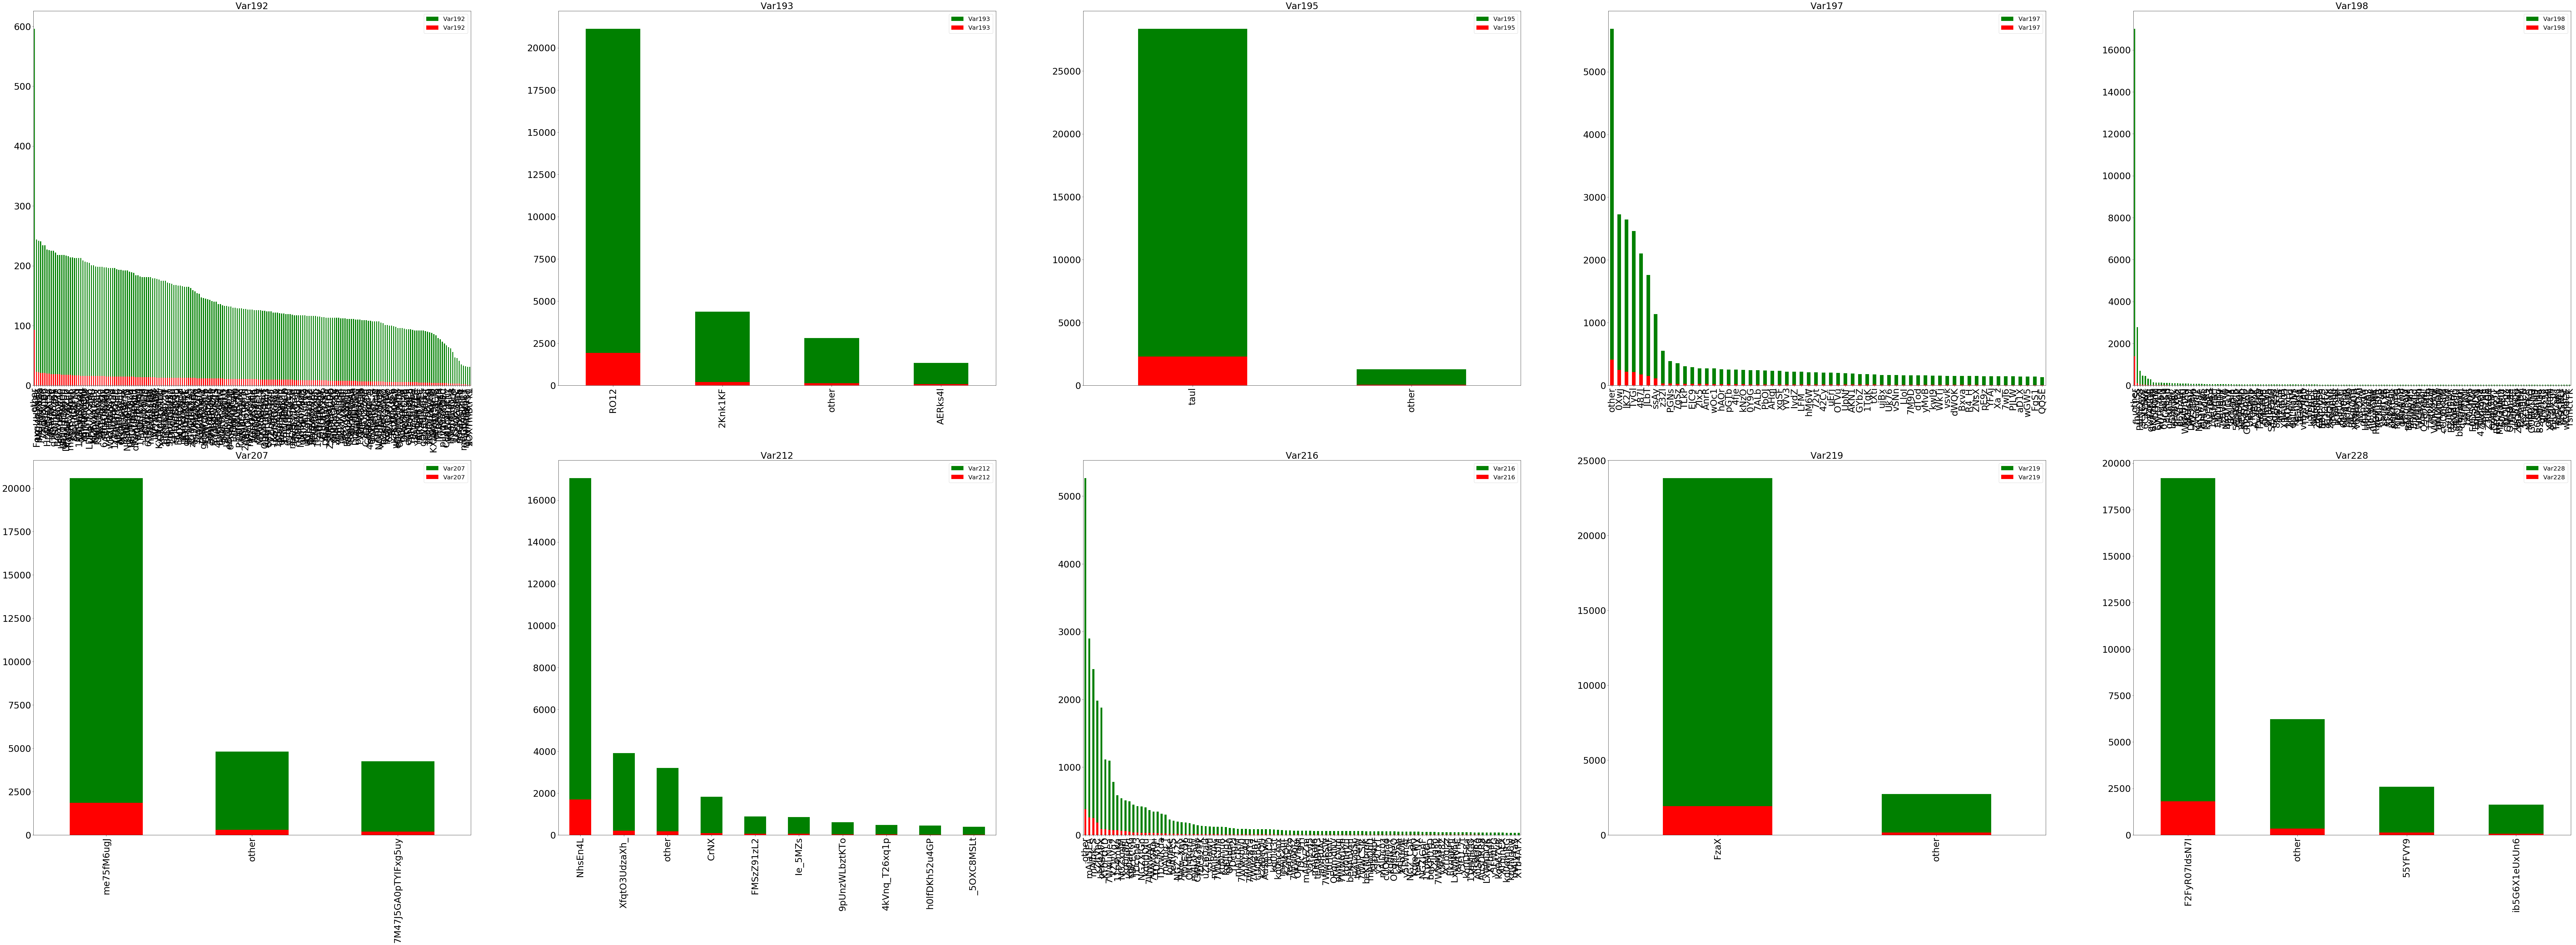

In [10]:
n = 2
m = 5
target_0 = df_kraft.loc[df_kraft.label == -1]
target_1 = df_kraft.loc[df_kraft.label == 1]
fig, axs = plt.subplots(n, m, figsize=((m//n+1)*50, 50))
k = 0
for i in range(n):
    for j in range(m):
            target_0[other_columns[k]].value_counts().plot(kind = 'bar', color = 'green', ax = axs[i][j])
            target_1[other_columns[k]].value_counts().plot(kind = 'bar', color = 'red', ax = axs[i][j])
            axs[i][j].set_title(other_columns[k], fontsize=30)
            axs[i][j].tick_params(axis="both", labelsize=30)
            axs[i][j].legend(prop={'size': 20})
            k+=1

У нас осталсь страшные распределения (192,197,198,216), но во многх лидирует other, так что в более строгом огранчении нет смысла, возможно позже мы откажемся от этих переменных

In [11]:
columns_3_group = list(other_columns) + ['Var210', 'Var227', 'Var221', 'Var206', 'Var196', 'Var203']

In [12]:
kf = KFold(n_splits=10,shuffle= True)

In [13]:
df_old, df_old_kraft = deepcopy(df), deepcopy(df_kraft)
for train_index, test_index in kf.split(df_old):
    print("TRAIN:", train_index, "TEST:", test_index)
    temp, temp_kraft = df_old.iloc[train_index], df_old_kraft.iloc[train_index]
    target_1_temp, target_1_temp_kraft = temp[temp.label == 1], temp_kraft[temp_kraft.label == 1]
    n = len(target_1_temp)
    for c in columns_3_group:
        di_start, di_start_kraft = {a:0 for a in set(df_old[c].iloc[test_index].values)}, {a:0 for a in set(df_old_kraft[c].iloc[test_index].values)}
        di_start.update(dict(target_1_temp[c].value_counts()/n))
        di_start_kraft.update(dict(target_1_temp_kraft[c].value_counts()/n))
        df[c].iloc[test_index],df_kraft[c].iloc[test_index]  = df_old[c].iloc[test_index].replace(di_start), df_old_kraft[c].iloc[test_index].replace(di_start_kraft)         


TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [    6    11    15 ... 31968 31971 31984]


//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


TRAIN: [    0     1     3 ... 31997 31998 31999] TEST: [    2    18    28 ... 31983 31989 31995]
TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [   19    25    26 ... 31959 31976 31978]
TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [   12    33    36 ... 31940 31948 31982]
TRAIN: [    0     1     2 ... 31994 31995 31998] TEST: [    4     7    13 ... 31996 31997 31999]
TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [   24    27    35 ... 31974 31979 31992]
TRAIN: [    0     2     3 ... 31997 31998 31999] TEST: [    1     5    10 ... 31970 31972 31990]
TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [    3     9    21 ... 31973 31975 31977]
TRAIN: [    0     1     2 ... 31996 31997 31999] TEST: [   14    51    73 ... 31991 31993 31998]
TRAIN: [    1     2     3 ... 31997 31998 31999] TEST: [    0     8    48 ... 31969 31987 31994]


In [14]:
df.iloc[:,41:-12].head()

,Var196,Var197,Var198,Var203,Var204,Var206,Var207,Var210,Var212,Var216,Var218,Var219,Var221,Var226,Var227,Var228
14307,0.987701,0.0037843,0.012772,0.893094,0.026327,0.175497,0.0392621,0.926679,0.0137181,0.000946074,0.540552,0.8193,0.0941343,0.082378,0.0614948,0.0113529
17812,0.987282,0.0909091,0,0.897786,0.019958,0.416863,0.786623,0.928403,0.7122,0.015073,0.407219,0.819124,0.809703,0.048408,0.787565,0.7626
11020,0.987718,0.00377893,0.0014171,0.891356,0.010191,0.175248,0.791214,0.926783,0.723666,0.00236183,0.540552,0.813888,0.815777,0.021656,0.792159,0.77043
15158,0.987264,0.0679245,0.0471698,0.891038,0.026327,0.00896226,0.0834906,0.927358,0.00377358,0.000471698,0.407219,0.0165094,0.808491,0.082378,0.0712264,0.0287736
24990,0.988224,0.00565238,0,0.892605,0.004671,0.424399,0.788036,0.928874,0.717852,0.107395,0.407219,0.00329722,0.811116,0.044586,0.788507,0.765426


In [15]:
df_kraft.iloc[:,41:-12].head()

,Var196,Var197,Var198,Var203,Var204,Var206,Var207,Var210,Var212,Var216,Var218,Var219,Var221,Var226,Var227,Var228
14307,0.987701,0.174551,0.012772,0.893094,0.026327,0.175497,0.129612,0.926679,0.0137181,0.161779,0.540552,0.8193,0.0941343,0.082378,0.0614948,0.148534
17812,0.987282,0.0909091,0.593971,0.897786,0.019958,0.416863,0.786623,0.928403,0.7122,0.015073,0.407219,0.819124,0.809703,0.048408,0.787565,0.7626
11020,0.987718,0.00377893,0.0014171,0.891356,0.010191,0.175248,0.791214,0.926783,0.723666,0.00236183,0.540552,0.813888,0.815777,0.021656,0.792159,0.77043
15158,0.987264,0.0679245,0.0471698,0.891038,0.026327,0.00896226,0.0834906,0.927358,0.00377358,0.159434,0.407219,0.0665094,0.808491,0.082378,0.0712264,0.0287736
24990,0.988224,0.00565238,0.594442,0.892605,0.004671,0.424399,0.788036,0.928874,0.717852,0.107395,0.407219,0.0682996,0.811116,0.044586,0.788507,0.765426


In [16]:
df['label'], df_kraft['label'] = df['label'].replace({-1:0}), df_kraft['label'].replace({-1:0})

### Для неизмененного датасета попробуем OverSampling

In [17]:
X_resampled, y_resampled = SMOTE().fit_resample(df.dropna().drop('label', axis = 1), df.dropna()['label'])
print(sorted(Counter(y_resampled).items()))

//anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[(0, 24661), (1, 24661)]


In [18]:
X_kraft, y_kraft = df_kraft.drop('label', axis =1).dropna().values, df_kraft.dropna()['label'].values

# Построение baseline-решений

Обучите 3 разные baseline-модели на полученных наборах данных и оцените их качество.   
На прошлой неделе вы выбрали методику оценки качества моделей на основе кросс-валидации, а также основную и вспомогательные метрики. Оцените с их помощью получившуюся модель.   
Обратите внимание, что под разными моделями понимаются именно разные алгоритмы классификации. Например, 2 модели, реализующие метод k ближайших соседей с разными k, будут считаться одним baseline-решением (хотя и с разными параметрами). Напоминаем, что отложенная выборка (hold-out dataset) не должна использоваться для построения и оценки baseline-моделей!

Можно (но не обязательно) рассмотреть следующий набор алгоритмов:

Линейная модель (например, реализация sklearn.linear_model.RidgeClassifier)  
Случайный лес (например, реализация sklearn.ensemble.RandomForestClassifier)  
Градиентный бустинг (например, реализация sklearn.ensemble.GradientBoostingClassifier)  
В качестве решения приложите получившийся jupyther notebook. Убедитесь, что в нем присутствуют:

все baseline-модели, которые вы построили;  
качество всех построенных моделей оценено с помощью кросс-валидации, и это понятно из текста в jupyther notebook; 
все модели оценены с помощью основной и дополнительных метрик качества.

### Выбор признаков/ Уменьшене размерности

In [19]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, precision_recall_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
from operator import itemgetter
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score, auc, precision_recall_curve, cohen_kappa_score
from sklearn.metrics import classification_report

fbeta_score(y_true, y_pred, beta = 3)
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        results.iloc[i,4] =auc(recall, precision)
        results.iloc[i,5] = matthews_corrcoef(y_true, y_pred)
        results.iloc[i,6] =cohen_kappa_score(y_true, y_pred)

In [20]:
def get_importances(X,y):
    print('FOREST')
    list_1 = list()
    forest = ExtraTreesRegressor(n_estimators=250,
                                  random_state=0)
    
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))
        if importances[indices[f]]<0.01:
            list_1.append(df.columns[indices[f]])
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    print('XGB')
    list_2 = list()
    def get_xgb_imp(xgb, feat_names):
        imp_vals = xgb.booster().get_fscore()
        imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
        total = np.sum(list(imp_dict.values()))
        return {k:v/total for k,v in imp_dict.items()}

    feat_names = df.columns
    np.random.seed(1)
    xgb = XGBClassifier(n_estimators=250)
    xgb = xgb.fit(X,y)
    imp = sorted(get_xgb_imp(xgb,feat_names).items(), key = itemgetter(1), reverse= True)
    for i,(k,v) in enumerate(imp):
        print("%d. %s (%f)" % (i + 1, k, v))
        if v<0.01:
            list_2.append(k)
    set_delete = set(list_1).intersection(set(list_2))
    return(set_delete)

FOREST
Feature ranking:
1. Var218 (0.129390)
2. Var205_09_Q (0.084422)
3. Var228 (0.070040)
4. Var212 (0.062131)
5. Var193 (0.053382)
6. Var208_sBgB (0.050204)
7. Var207 (0.046007)
8. Var227 (0.044443)
9. Var205_VpdQ (0.040519)
10. Var221 (0.036540)
11. Var206 (0.035680)
12. Var205_sJzTlal (0.028301)
13. Var197 (0.020089)
14. Var7 (0.017674)
15. Var210 (0.014704)
16. Var211_L84s (0.014336)
17. label (0.014288)
18. Var216 (0.013594)
19. Var198 (0.012365)
20. Var219 (0.011054)
21. Var226 (0.010713)
22. Var144 (0.009021)
23. Var203 (0.008728)
24. Var73 (0.007189)
25. Var113 (0.007070)
26. Var76 (0.006282)
27. Var223_bCPvVye (0.006189)
28. Var133 (0.005639)
29. Var65 (0.005447)
30. Var57 (0.005394)
31. Var192 (0.005213)
32. Var38 (0.005207)
33. Var153 (0.005187)
34. Var204 (0.005172)
35. Var134 (0.005153)
36. Var28 (0.004871)
37. Var149 (0.004746)
38. Var196 (0.004636)
39. Var163 (0.004617)
40. Var140 (0.004412)
41. Var81 (0.004339)
42. Var195 (0.004179)
43. Var125 (0.004078)
44. Var83 (0.

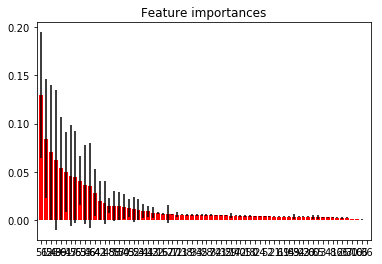

XGB
1. Var196 (0.303772)
2. Var210 (0.039709)
3. Var218 (0.035076)
4. Var144 (0.033091)
5. Var203 (0.030443)
6. Var193 (0.029120)
7. Var7 (0.027796)
8. Var205_09_Q (0.026473)
9. Var57 (0.025811)
10. Var206 (0.025811)
11. Var228 (0.024487)
12. Var212 (0.023163)
13. Var219 (0.021840)
14. Var113 (0.019854)
15. Var226 (0.018531)
16. Var221 (0.017207)
17. Var197 (0.017207)
18. Var65 (0.013898)
19. Var195 (0.013898)
20. Var81 (0.012574)
21. Var73 (0.012574)
22. Var198 (0.011251)
23. Var205_sJzTlal (0.009927)
24. Var216 (0.009927)
25. Var38 (0.009927)
26. Var204 (0.009265)
27. label (0.009265)
28. Var208_sBgB (0.009265)
29. Var125 (0.008604)
30. Var123 (0.008604)
31. Var28 (0.008604)
32. Var76 (0.008604)
33. Var163 (0.008604)
34. Var83 (0.007942)
35. Var74 (0.007942)
36. Var133 (0.007280)
37. Var207 (0.007280)
38. Var205_VpdQ (0.007280)
39. Var192 (0.007280)
40. Var6 (0.007280)
41. Var227 (0.006618)
42. Var112 (0.005295)
43. Var21 (0.005295)
44. Var25 (0.005295)
45. Var153 (0.005295)
46. Var1

In [21]:
set_del = get_importances(X_resampled, y_resampled)

FOREST
Feature ranking:
1. Var113 (0.033980)
2. Var192 (0.027754)
3. Var57 (0.025422)
4. Var28 (0.024495)
5. Var204 (0.023456)
6. Var134 (0.023423)
7. Var216 (0.023119)
8. Var73 (0.023115)
9. Var76 (0.023075)
10. Var197 (0.022233)
11. Var226 (0.021423)
12. Var133 (0.021214)
13. Var38 (0.021027)
14. Var163 (0.020747)
15. Var149 (0.020722)
16. Var81 (0.020616)
17. Var212 (0.020509)
18. Var153 (0.019875)
19. Var125 (0.019838)
20. Var6 (0.019377)
21. Var83 (0.018597)
22. Var206 (0.018309)
23. Var198 (0.018304)
24. Var144 (0.018125)
25. Var123 (0.017846)
26. Var65 (0.017679)
27. Var112 (0.017387)
28. Var13 (0.017310)
29. Var25 (0.017163)
30. Var85 (0.016507)
31. Var119 (0.016394)
32. Var140 (0.016376)
33. Var160 (0.016160)
34. Var24 (0.015991)
35. Var210 (0.015950)
36. Var109 (0.015553)
37. Var196 (0.015372)
38. Var195 (0.015194)
39. Var219 (0.014137)
40. Var203 (0.014031)
41. Var74 (0.013895)
42. Var22 (0.013087)
43. Var21 (0.012892)
44. Var193 (0.012771)
45. Var221 (0.012323)
46. Var228 (

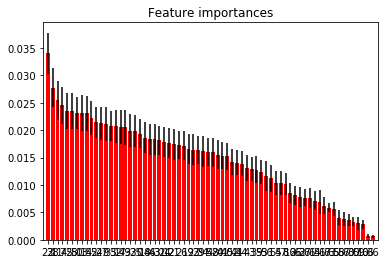

XGB
1. Var113 (0.079190)
2. Var73 (0.062001)
3. Var81 (0.054021)
4. Var192 (0.039902)
5. Var57 (0.036219)
6. Var38 (0.034377)
7. Var153 (0.033149)
8. Var204 (0.028852)
9. Var74 (0.028852)
10. Var197 (0.028238)
11. Var28 (0.028238)
12. Var216 (0.027624)
13. Var13 (0.026397)
14. Var212 (0.023941)
15. Var6 (0.022713)
16. Var206 (0.020872)
17. Var210 (0.019030)
18. Var133 (0.019030)
19. Var218 (0.016575)
20. Var149 (0.016575)
21. Var119 (0.016575)
22. Var123 (0.015961)
23. Var76 (0.015961)
24. Var140 (0.015961)
25. Var125 (0.015347)
26. Var205_VpdQ (0.015347)
27. Var134 (0.014733)
28. Var227 (0.013505)
29. Var228 (0.013505)
30. Var226 (0.012891)
31. Var65 (0.012891)
32. Var203 (0.011664)
33. Var160 (0.011664)
34. Var198 (0.011664)
35. Var221 (0.010436)
36. Var196 (0.010436)
37. Var21 (0.010436)
38. Var193 (0.009822)
39. Var83 (0.009208)
40. Var195 (0.009208)
41. Var163 (0.009208)
42. label (0.008594)
43. Var219 (0.007980)
44. Var112 (0.007366)
45. Var85 (0.006753)
46. Var25 (0.006139)
47. 

In [22]:
set_del_kraft =get_importances(X_kraft, y_kraft)

Оставляем по  версии каждого датаcета:   
1) С удаленными маловажными признаками  
2) С уменьшенной размерностью  

In [23]:
from sklearn.decomposition import PCA
pca = PCA(20)
kraft_pca = PCA(20)
X_pca = pca.fit_transform(X_resampled)
X_kraft_pca = kraft_pca.fit_transform(X_kraft)

In [ ]:
X_resampled = pd.DataFrame(X_resampled, columns = df.drop('label', axis = 1).columns).drop(set_del, axis = 1).values

In [53]:
set_del_kraft = list(set_del_kraft)
set_del_kraft.remove('label')

In [54]:
X_kraft = df_kraft.drop(list(set_del_kraft)+['label'], axis = 1).dropna().values
y_kraft = df_kraft.drop(list(set_del_kraft), axis = 1).dropna()['label'].values

In [28]:
X_resampled.shape

(49322, 30)

## Подытог:
У нас 4 версии выборки: две oversampling (обычная, pca), две с крафтовым признаками   
Теперь осталось напсать общую функцию для 3 бэйзлайнов с валидацией Stratified KFold и печатью репорта с метриками
#### P.S. хотела сделать просто, но получлось как всегда (прости, дорогой читатель)

In [58]:
def model_forecast(X,y, clf, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kappa_scorer = make_scorer(cohen_kappa_score)
    model = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=StratifiedKFold(5, shuffle= True), scoring = kappa_scorer)
    model.fit(X_train, y_train)
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(model.best_score_)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    pr,rec, _ = precision_recall_curve(y_test, y_pred)
    print('AUC PR-curve: ', auc(rec,pr))
    print('AUC ROC-curve: ', roc_auc_score(y_test, y_pred))
    print('Cohen_Kappa: ', cohen_kappa_score(y_test, y_pred))
    return y_pred, model.best_score_ , y_test


In [59]:
rc = RidgeClassifier()
param_rc = {'solver':['auto','svd', 'lsqr', 'sag'], 'alpha': [0.5,1,1.5,2]}
rf = RandomForestClassifier(n_jobs=-1)
param_rf = {'n_estimators':[10,100,500,1000]}
xgb = GradientBoostingClassifier()
param_xgb ={'loss' : ['deviance', 'exponential'], 'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2], 'n_estimators':[10,100,500]}

name = ['RC', 'RF', 'XGB']
params = [param_rc, param_rf, param_xgb]
clfs = [rc, rf, xgb]

In [60]:
dictionary_results = dict()
for i in range(3):
    print('GSCV for {}!'.format(name[i]))
    dictionary_clf,dictionary_temp  = dict(), dict()
    print('\nResampled')
    dictionary_temp['y_pred'], dictionary_temp['score'], dictionary_temp['y_test'] = model_forecast(X_resampled, y_resampled, clfs[i], params[i])
    dictionary_clf['resampled'] = deepcopy(dictionary_temp)
    print('\nKraft')
    dictionary_temp['y_pred'], dictionary_temp['score'], dictionary_temp['y_test'] = y_pred, score, y_test = model_forecast(X_kraft, y_kraft, clfs[i], params[i])
    dictionary_clf['kraft'] = deepcopy(dictionary_temp)
    print('\nResampled PCA')
    dictionary_temp['y_pred'], dictionary_temp['score'], dictionary_temp['y_test'] = y_pred, score, y_test = model_forecast(X_pca, y_resampled, clfs[i], params[i])
    dictionary_clf['resampled_pca'] = deepcopy(dictionary_temp)
    print('\nKraft PCA')
    dictionary_temp['y_pred'], dictionary_temp['score'], dictionary_temp['y_test'] = y_pred, score, y_test = model_forecast(X_kraft_pca, y_kraft, clfs[i], params[i])
    dictionary_clf['kraft_pca'] = deepcopy(dictionary_temp)
    
    dictionary_results[name[i]] = dictionary_clf
    print('\n\n')

GSCV for RC!

Resampled
Best Params:
{'solver': 'auto', 'alpha': 2}
Best CV Score:
0.228434373974317
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      4891
           1       0.62      0.64      0.63      4974

    accuracy                           0.62      9865
   macro avg       0.62      0.62      0.62      9865
weighted avg       0.62      0.62      0.62      9865

AUC PR-curve:  0.7218503636054823
AUC ROC-curve:  0.6212927340757093
Cohen_Kappa:  0.24266826000860042

Kraft
Best Params:
{'solver': 'lsqr', 'alpha': 0.5}
Best CV Score:
0.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4945
           1       0.00      0.00      0.00       366

    accuracy                           0.93      5311
   macro avg       0.47      0.50      0.48      5311
weighted avg       0.87      0.93      0.90      5311

AUC PR-curve:  0.5344567877989079
AUC ROC-curve:  0.5
Cohen_Kappa:  0.

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Params:
{'solver': 'auto', 'alpha': 0.5}
Best CV Score:
0.12212103317717561
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      4891
           1       0.56      0.63      0.59      4974

    accuracy                           0.56      9865
   macro avg       0.56      0.56      0.56      9865
weighted avg       0.56      0.56      0.56      9865

AUC PR-curve:  0.6857842169316624
AUC ROC-curve:  0.5589726565875122
Cohen_Kappa:  0.11807522933201309

Kraft PCA
Best Params:
{'solver': 'auto', 'alpha': 0.5}
Best CV Score:
0.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4945
           1       0.00      0.00      0.00       366

    accuracy                           0.93      5311
   macro avg       0.47      0.50      0.48      5311
weighted avg       0.87      0.93      0.90      5311

AUC PR-curve:  0.5344567877989079
AUC ROC-curve:  0.5
Cohen_Kappa:  0.0



GSCV for RF

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Params:
{'n_estimators': 1000}
Best CV Score:
0.9209638224607772
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4891
           1       1.00      0.92      0.96      4974

    accuracy                           0.96      9865
   macro avg       0.96      0.96      0.96      9865
weighted avg       0.96      0.96      0.96      9865

AUC PR-curve:  0.9806128309174255
AUC ROC-curve:  0.960896662645758
Cohen_Kappa:  0.9211820459495578

Kraft
Best Params:
{'n_estimators': 10}
Best CV Score:
0.0029225328073692663
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4945
           1       0.00      0.00      0.00       366

    accuracy                           0.93      5311
   macro avg       0.47      0.50      0.48      5311
weighted avg       0.87      0.93      0.90      5311

AUC PR-curve:  0.03445678779890793
AUC ROC-curve:  0.49919110212335693
Cohen_Kappa:  -0.002956891

//anaconda/lib/python3.5/site-packages/joblib/externals/loky/process_executor.py:683: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Params:
{'n_estimators': 500}
Best CV Score:
0.842879041484724
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4891
           1       0.93      0.95      0.94      4974

    accuracy                           0.94      9865
   macro avg       0.94      0.94      0.94      9865
weighted avg       0.94      0.94      0.94      9865

AUC PR-curve:  0.952099536018886
AUC ROC-curve:  0.9383583635107013
Cohen_Kappa:  0.8769037119377614

Kraft PCA
Best Params:
{'n_estimators': 10}
Best CV Score:
0.0008291591270381165
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4945
           1       0.14      0.00      0.01       366

    accuracy                           0.93      5311
   macro avg       0.54      0.50      0.48      5311
weighted avg       0.88      0.93      0.90      5311

AUC PR-curve:  0.10715733521709983
AUC ROC-curve:  0.5007594468110969
Cohen_Kappa:  0.002782559

IndexError: list index out of range

In [67]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

json_dump = json.dumps(dictionary_results, cls=NumpyEncoder)

with open('dictionary_results.json', 'w') as f:
    json.dump(json_dump, f)

## Вывод
Из всех выборок лучше всего себя показала resampled  

Результаты классифкаторов:  
 
Ridge Classifier  
AUC PR-curve:  0.7218503636054823   
AUC ROC-curve:  0.6212927340757093  
Cohen_Kappa:  0.24266826000860042  

Random Forest  
AUC PR-curve:  0.9806128309174255  
AUC ROC-curve:  0.960896662645758  
Cohen_Kappa:  0.9211820459495578  

XGBoosting  
AUC PR-curve:  0.9802506691996646  
AUC ROC-curve:  0.9609852443090495  
Cohen_Kappa:  0.9213826524733341   